In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ls

'Lane Detection In Images.ipynb'   README.md   test2.mp4   test_image.jpg


# openCV

In [3]:
image=cv2.imread("test_image.jpg")

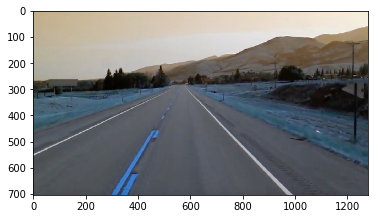

In [4]:
plt.imshow(image)

# Greyscale conversion

edge detection = identifying sharp changes of intensity in adjacent pixels

pixel intensity from 0 (black) to 255 (white)

In [5]:
lane_image=np.copy(image)
gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
#more straightforward way ?

In [6]:
lane_image

array([[[116,  91,  75],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [248, 238, 215],
        [248, 238, 215],
        [248, 238, 215]],

       [[157, 133, 106],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [247, 238, 215],
        [247, 238, 215],
        [247, 238, 215]],

       [[185, 163, 127],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [247, 238, 215],
        [247, 238, 215],
        [247, 238, 215]],

       ...,

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 73,  74,  82],
        [ 73,  74,  82],
        [ 73,  74,  82]],

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 72,  73,  81],
        [ 72,  73,  81],
        [ 72,  73,  81]],

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 72,  73,  81],
        [ 72,  73,  81],
        [ 72,  73,  81]]

In [7]:
lane_image.shape
#(nb pix row, nb pix col, nb channels)

(704, 1279, 3)

In [8]:
gray

array([[ 97, 175, 175, ..., 238, 238, 238],
       [137, 175, 175, ..., 238, 238, 238],
       [165, 175, 175, ..., 238, 238, 238],
       ...,
       [ 79,  79,  79, ...,  75,  75,  75],
       [ 79,  79,  79, ...,  74,  74,  74],
       [ 79,  79,  79, ...,  74,  74,  74]], dtype=uint8)

In [9]:
gray.shape

(704, 1279)

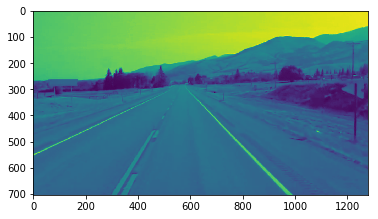

In [10]:
plt.imshow(gray)

# Gaussian blur
Apply convolutional kernel 5 by 5 : good kernel

In [11]:
blur=cv2.GaussianBlur(gray,(5,5),0)
# last option is deviation of the blur

In [12]:
blur.shape #same shape

(704, 1279)

In [13]:
blur

array([[156, 163, 172, ..., 238, 238, 238],
       [161, 165, 173, ..., 238, 238, 238],
       [168, 170, 174, ..., 238, 238, 238],
       ...,
       [ 79,  79,  79, ...,  75,  75,  75],
       [ 79,  79,  79, ...,  74,  74,  74],
       [ 79,  79,  79, ...,  74,  74,  74]], dtype=uint8)

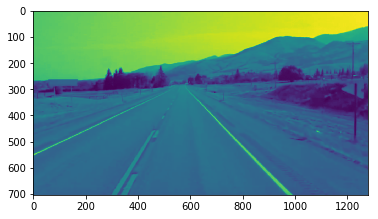

In [14]:
plt.imshow(blur)

# Canny
computes gradient and keeps largest gradients as white pixels

In [15]:
canny_image=cv2.Canny(blur,50,150)
#last 2 item : low & high thresholds
# investigate

In [16]:
canny_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

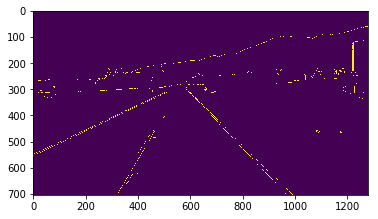

In [17]:
plt.imshow(canny_image)

# creating function

In [18]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny_image=cv2.Canny(blur,50,150)
    return canny_image

# focus on region of interest
triangle containing the lines

In [19]:
def region_of_interest(image):
    height=image.shape[0]
    polygons=np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask=np.zeros_like(image)
    #fill back (0) image with white (255) polygon
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

In [20]:
gray.shape

(704, 1279)

In [21]:
polygons=np.array([(200,500),(1100,500),(550,250)])
polygons

array([[ 200,  500],
       [1100,  500],
       [ 550,  250]])

# binary and binary-wise operations
AND operation to apply mask

In [22]:
#cv2.bitwise_and(image,mask)
# in function region_of_interest

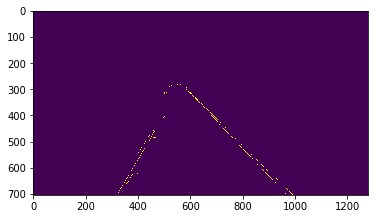

In [23]:
cropped_image=region_of_interest(canny_image)
plt.imshow(cropped_image)

# Hough transform to detect straight lines
y=m*x+b cartesian space

Hough space: b=func(m)

A line in cartesian space in transformed into a point in Hough space

A point in cartesian => line in Hough space

Aligned points? Bin and vote for max of intersections of lines in Hough space.

Deal with infinity (vertical line) => use polar coordinates (rho,theta)

# implementation

In [24]:
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,
                     np.array([]),
                     minLineLength=40,
                     maxLineGap=5)
# image,
# Hough accumulator array resolution (bins) : 2pix, 1deg_in_rad
# threshold of votes to qualify as line
# dummy array
# length line in pix accepted as output
# max distance in pix accepted as line

def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            # draw line (blue color), thickness
            cv2.line(line_image,(x1,y1),(x2,y2),
                     (255,0,0),
                    10)
    return line_image

In [25]:
lines

array([[[704, 418, 927, 641]],

       [[704, 426, 791, 516]],

       [[320, 703, 445, 494]],

       [[585, 301, 663, 381]],

       [[630, 341, 670, 383]],

       [[794, 520, 861, 591]],

       [[659, 371, 704, 416]],

       [[870, 599, 939, 672]],

       [[767, 493, 807, 534]],

       [[423, 509, 454, 461]],

       [[940, 653, 991, 702]],

       [[824, 551, 879, 609]],

       [[676, 389, 754, 467]]], dtype=int32)

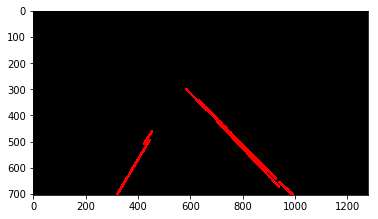

In [26]:
line_image=display_lines(image,lines)
plt.imshow(line_image)

In [27]:
# merging the 2 (original image + lines)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)

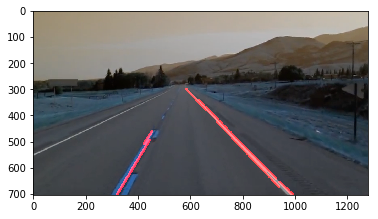

In [28]:
plt.imshow(combo_image)

# Optimization of display
1. separate left and right lines using the coeff of the line (increasing or decreasing
2. average the left and right lines separately

In [29]:
def make_coordinates(image,line_parameters):
    slope,intercept=line_parameters
    y1=image.shape[0]
    y2=int(y1*3/5)#3/5 of the image
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

def average_slope_intercept(image,lines):
    left_fit,right_fit=[],[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1)#fit polyn of deg 1 == line
        slope,intercept=parameters[0],parameters[1]
        if slope<0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average=np.average(left_fit,axis=0)
    right_fit_average=np.average(right_fit,axis=0)
    left_line=make_coordinates(image,left_fit_average)
    right_line=make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])

In [30]:
averaged_lines=average_slope_intercept(lane_image,lines)
line_image_average=display_lines(lane_image,averaged_lines)
combo_image_average=cv2.addWeighted(lane_image,0.8,line_image_average,1,1)

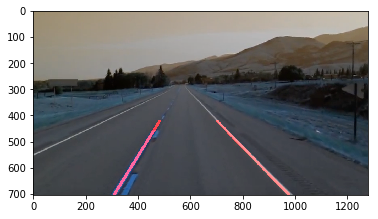

In [31]:
plt.imshow(combo_image_average)

# Detect Lanes In Video
1. Open video in openCV
2. apply the algo on every frame

In [33]:
cap=cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    pass

KeyboardInterrupt: 